In [1]:
#How many different products are there?
import pandas as pd
from matplotlib import pyplot
file_path="Amazon_review.csv"
data = pd.read_csv(file_path)
#give hader name based on data
data.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']
#name is product name   
name = data["name"]
name.unique()

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,',
       'Kindle Keyboard,,,\r\nKindle Keyboard,,,',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,',
       'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,',
       'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi -  Includes Special Offers,,',
       'Amazon Kindle Fire Hd (3rd Generation)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


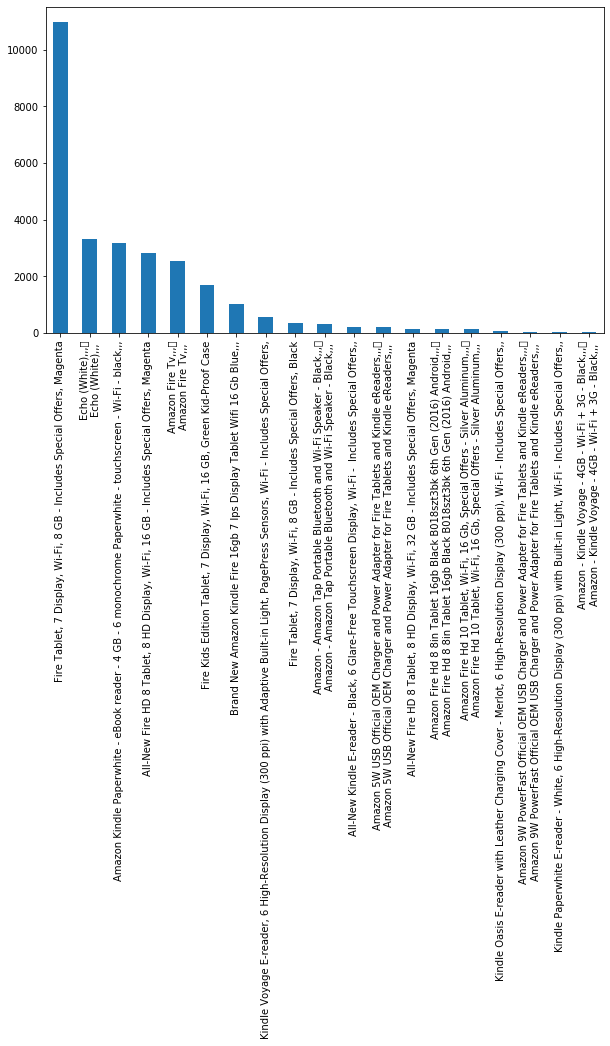

In [2]:
#How many reviews per each product?
x=name.value_counts()
#selected products with more than 20 reviews for plot
x=x[x>20]
x.plot(kind='bar',figsize=(10,6))

   rating  No of Users
0     5.0        23775
1     4.0         8541
2     3.0         1499
3     1.0          410
4     2.0          402


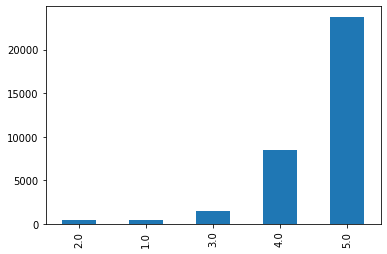

In [3]:
#how many users per rating?
review_rate=pd.DataFrame(data.groupby('rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
print(review_rate.head())
#count the ratings per user for plot
data["rating"].value_counts().sort_values().plot.bar()


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


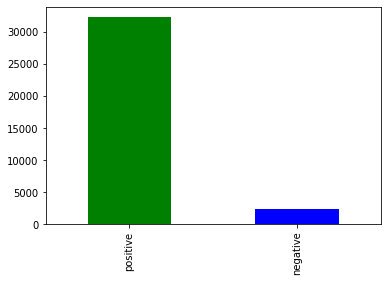

In [4]:
#Positive and negative ratings comparison.
data_interest = data[['categories','rating' , 'text' , 'title' , 'username']]
sentiment = data_interest[data_interest["rating"].notnull()]
sentiment.head()
#give positive and negative label based on rating
sentiment["sentiment"] = sentiment["rating"]>3
sentiment["sentiment"] = sentiment["sentiment"].replace([True , False] , ["positive" , "negative"])
sentiment.head()
sentiment["sentiment"].value_counts().plot.bar(color=['green', 'blue'])
    

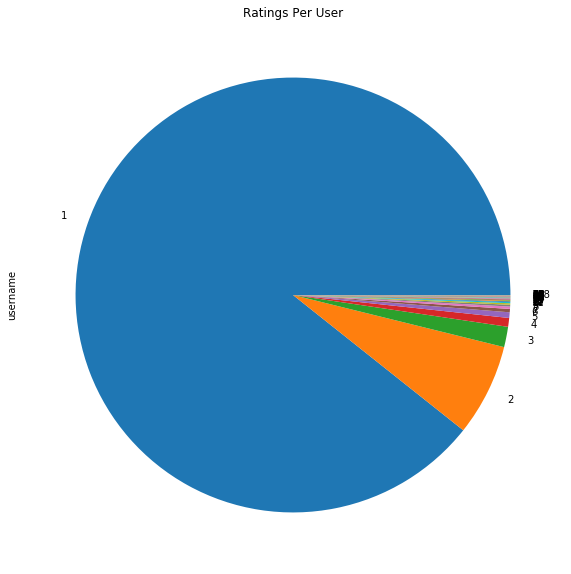

In [5]:
#How many reviews given by each user?
rating_perperson=data.username.value_counts()
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')